# Pragmatic Evaluation

In this notebook, you will learn how to run a k-flod test, as well as create different metrics based on confusion matrix

## Authors
- Xiao Fu and Sahan Bulathwela

## Learning Outcomes
- **K-Fold Cross Validation:** Testing accuracy for just once doesn't account for the variance in the data and might give misleading results. K-Fold validation randomly selects one of $k$ parts of the data set then tests the accuracy on the same. After required number of iterations, the accuracy is averaged
- **Confusion matrix:** The Confusion matrix is used only on classification tasks. It describes the following matrix
- **Classification Metrics:** Several popular metrics that are used for evaluating classification performance

## Source
- https://github.com/maykulkarni/Machine-Learning-Notebooks


## Task

1. Run a K-fold test
2. Build evaluation metrics

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## Importing the Dataset

A simple dataset available from https://www.kaggle.com/datasets/rakeshrau/social-network-ads/

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')
X = df.iloc[:, 2:4]
y = df.iloc[:, 4]

df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
# Checking data X
X.head(10)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [4]:
# Checking targets y
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

# K-Fold Cross Validation
https://machinelearningmastery.com/k-fold-cross-validation/


        
Cross-validation is a method used to assess machine learning models on a limited data sample.

This method involves a key parameter named k, indicating the number of subsets the dataset should be divided into. This is why it's frequently referred to as k-fold cross-validation. When you choose a specific value for k, you can name the procedure accordingly, for instance, if k=10, it's called 10-fold cross-validation.

Here's the step-by-step process:

1. Shuffle the dataset (Recommended but not included in this notebook).

2. Divide the dataset into k subsets.

3. For each distinct subset:

    Use this subset as the testing data.

    Utilize the other subsets as the training data.

    Train a model using the training data and test its performance on the testing data.

    Keep the performance metric and then discard that particular model.

## Index split
In the first step, finish `k_flod_split_index` to split list `indices` into `k` parts.

In [7]:
def k_flod_split_index(indices: [], k=10) -> []:
    splited_indices = []
    n = len(indices)
    fold_size = n // k  # 每折大小
    
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else n
        splited_indices.append(indices[start:end])
    
    return splited_indices

In [8]:
indices = np.arange(len(X))
folds = k_flod_split_index(indices, 10)

for i, f in enumerate(folds):
    print(f"Fold {i+1}: {len(f)} samples, first few indices {f[:5]}")

Fold 1: 40 samples, first few indices [0 1 2 3 4]
Fold 2: 40 samples, first few indices [40 41 42 43 44]
Fold 3: 40 samples, first few indices [80 81 82 83 84]
Fold 4: 40 samples, first few indices [120 121 122 123 124]
Fold 5: 40 samples, first few indices [160 161 162 163 164]
Fold 6: 40 samples, first few indices [200 201 202 203 204]
Fold 7: 40 samples, first few indices [240 241 242 243 244]
Fold 8: 40 samples, first few indices [280 281 282 283 284]
Fold 9: 40 samples, first few indices [320 321 322 323 324]
Fold 10: 40 samples, first few indices [360 361 362 363 364]


## Run K-flod

Next, finish `run_eval` to run a K-flod test.

C:\Users\10375\AppData\Local\Temp\ipykernel_28988\2959444809.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_row], ignore_index=True)


Ave. score: 0.82


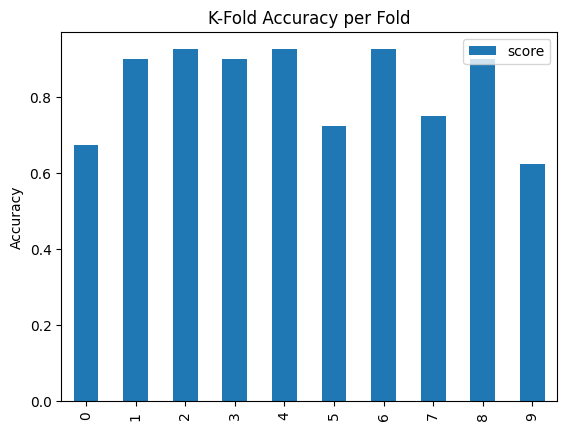

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)

def run_eval(X, y, k=10, evaluation=accuracy_score):
    correct = 0
    total = 0
    scores = pd.DataFrame(columns=['score'])
    splited_indices = k_flod_split_index(range(len(X)), k)

    for i in range(len(splited_indices)):

        # ---------- Create train/test indices ----------
        test_indices = np.array(splited_indices[i])
        all_indices = np.arange(len(X))
        train_indices = np.setdiff1d(all_indices, test_indices)
        # ------------------------------------------------

        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], \
                                           y[train_indices], y[test_indices]

        # Train a new logistic regression model
        clf = LogisticRegression().fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = clf.predict(X_test)
        _score = evaluation(y_test, y_pred)

        # ---------- Save the performance ----------
        new_row = pd.DataFrame({'score': [_score]})
        scores = pd.concat([scores, new_row], ignore_index=True)
        correct += _score
        total += 1
        # -------------------------------------------

    print("Ave. score: {0:.2f}".format(correct / total))
    scores.plot.bar(title="K-Fold Accuracy per Fold", ylabel="Accuracy")
    plt.show()

# run the k-fold evaluation
run_eval(X, y)

# Confusion Matrix

Confusion matrix is used only on classification tasks. It describes the following matrix

|            | predicted true | predicted false |
|------------|----------------|-----------------|
|actual true | True Positive  | False Negative  |
|actual false| False Positive | True Negative   |

Complete the function `calculate_matrix`, by computing the four parts of the confusion matrix created in the function.

In [ ]:
def calculate_matrix(y_true:[], y_pred:[]):
    """
    Computes the four counts in the confusion matrix.

    params: 
        y_true: list of actual labels
        y_pred: list of predicted labels    

    returns:
        tp: number of true positives
        tn: number of true negatives
        fp: number of false positives
        fn: number of false negatives
    """
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    #Insert Your Code Here
   

    
    
    #=====================
    
    return tp, tn, fp, fn

## Accuracy

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Complete the function `accuracy`



In [11]:
def calculate_matrix(y_true: [], y_pred: []):
    """
    Computes the four counts in the confusion matrix.

    params:
        y_true: list of actual labels
        y_pred: list of predicted labels

    returns:
        tp: number of true positives
        tn: number of true negatives
        fp: number of false positives
        fn: number of false negatives
    """
    tp = tn = fp = fn = 0

    # Traverse all samples and count
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
        elif yt == 0 and yp == 0:
            tn += 1
        elif yt == 0 and yp == 1:
            fp += 1
        elif yt == 1 and yp == 0:
            fn += 1

    return tp, tn, fp, fn

y_true = [1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0]

tp, tn, fp, fn = calculate_matrix(y_true, y_pred)
print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")


TP=3, TN=3, FP=1, FN=1


Now we can call your accuracy in the K-fold test. Does it get the same result as the previous test?

Ave. score: 0.82


C:\Users\10375\AppData\Local\Temp\ipykernel_28988\2959444809.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_row], ignore_index=True)


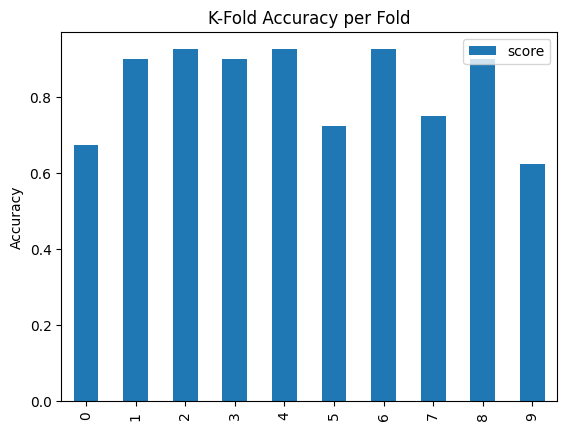

In [13]:
def accuracy(y_true, y_pred):
    tp, tn, fp, fn = calculate_matrix(y_true, y_pred)
    acc = (tp + tn) / (tp + tn + fp + fn)
    return acc

run_eval(X,y,evaluation=accuracy)

## Precision (Positive Predicted Value) 

$$\text{Precision} = \frac{TP}{TP + FP}$$

Intuitively, what precision states is out of the number of times your model predicts true, how many times is it correct? This metric penalizes heavily for False Positives. This metric should be considered when its OK to have some false negatives but not false positives. Imagine if your model is predicting the conclusion of a jurisdiction. Its OK to leave a criminal free, rather than punishing an innocent one. 

## Recall (Sensitivity) 

$$\text{Recall} = \frac{TP}{TP + FN}$$

Intuitively, what recall states is out of the times the output is true, how many times are you correct? This metric penalizes heavily for False Negatives. This metric should be considered when its OK to have some false positives but not false negatives.


## F1 Score

F1 score is the harmonic mean of precision and recall. 


$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

Finish implementing the `precision`, `recall` and `f1` functions below, where Precision, Recall and F1 are calculated.

In [14]:
def precision(y_true: [], y_pred: []):
    """
    Computes the precision score.
    """
    tp, tn, fp, fn = calculate_matrix(y_true, y_pred)
    if tp + fp == 0:
        p = 0
    else:
        p = tp / (tp + fp)
    return p


def recall(y_true: [], y_pred: []):
    """
    Computes the recall score.
    """
    tp, tn, fp, fn = calculate_matrix(y_true, y_pred)
    if tp + fn == 0:
        r = 0
    else:
        r = tp / (tp + fn)
    return r


def f1(y_true: [], y_pred: []):
    """
    Computes the f1 score.
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if (p + r) == 0:
        f1 = 0
    else:
        f1 = 2 * p * r / (p + r)
    return f1


C:\Users\10375\AppData\Local\Temp\ipykernel_28988\2959444809.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_row], ignore_index=True)


Ave. score: 0.58


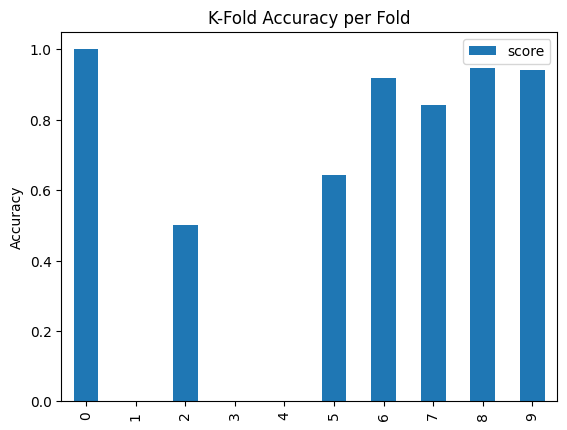

In [15]:
run_eval(X,y,evaluation=precision)

Ave. score: 0.44


C:\Users\10375\AppData\Local\Temp\ipykernel_28988\2959444809.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_row], ignore_index=True)


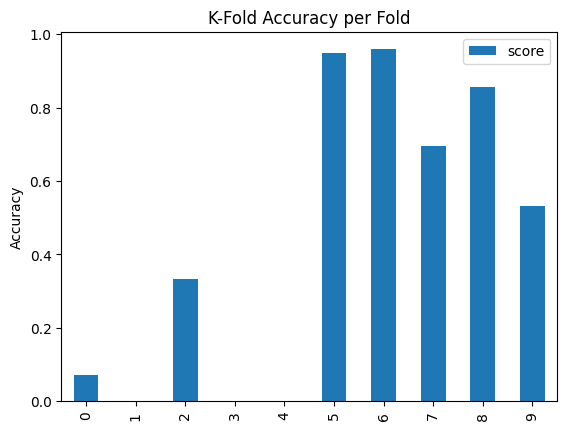

In [16]:
run_eval(X,y,evaluation=recall)

Ave. score: 0.46


C:\Users\10375\AppData\Local\Temp\ipykernel_28988\2959444809.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, new_row], ignore_index=True)


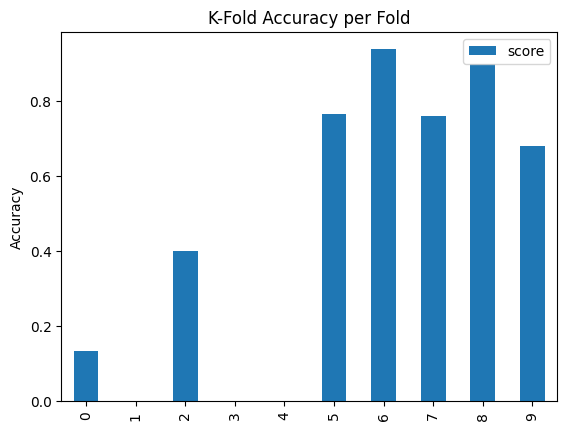

In [17]:
run_eval(X,y,evaluation=f1)